In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
out_dir = "./data/out"
optim_dir = os.path.join(out_dir,"tabu-search")
res_dir = os.path.join(optim_dir, "06")

In [3]:
progress = pd.read_csv(os.path.join(res_dir, "progress.csv"))
progress.head()

,best fitness,curr fitness,tabu list size
0,23.793642,23.793642,1
1,29.015938,29.015938,2
2,31.747969,31.747969,3
3,150.180771,150.180771,4
4,162.019440,162.019440,5


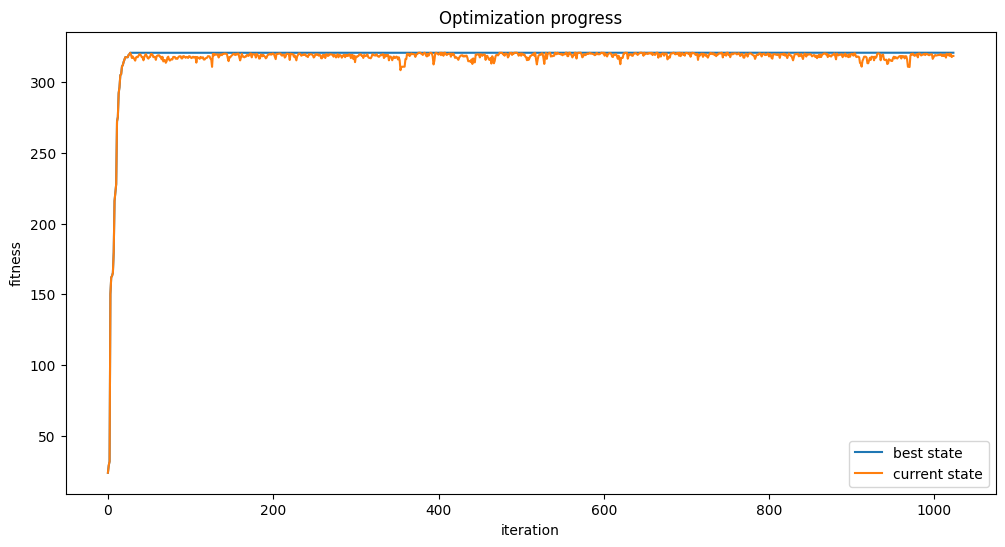

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax.plot(progress["best fitness"], label="best state")
ax.plot(progress["curr fitness"], label="current state")
ax.set_title("Optimization progress")
ax.set_xlabel("iteration")
ax.set_ylabel("fitness")
ax.legend();

In [5]:
progress_path = os.path.join(res_dir, "progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)